In [5]:
%%bash
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

Couldn't find program: 'bash'


In [6]:
gdown 1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU

SyntaxError: invalid decimal literal (946426022.py, line 1)

In [8]:
import gdown

url = 'https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU'
output = './data/ads.csv'  # specify the desired output file name and extension

gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1LIRkum4Lnn7ZdToKjnls-bd0MBjPqWmU
To: D:\01_june_data_science\02_broadway\Data_science_19thApril\projects\data\ads.csv
100%|█████████████████████████████████████████████████████████████████████████████████████| 4.76k/4.76k [00:00<?, ?B/s]


'./data/ads.csv'

In [9]:
# Importing necessary tools for EDA.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv("./data/ads.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [14]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


**From the above infos we can say that:**
* The dataframe consists of 4 columns and 200 rows.
* No null datas are present.
* Datas are in numeric form.

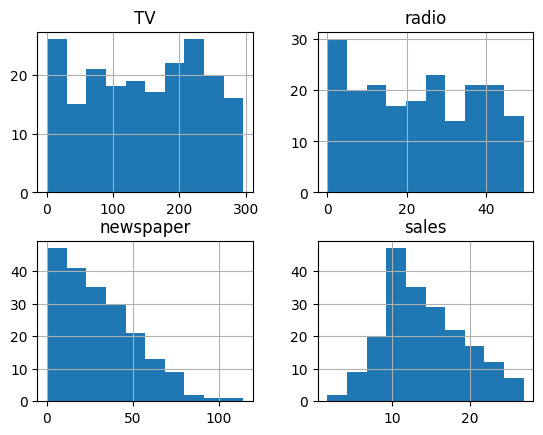

In [18]:
df.hist();

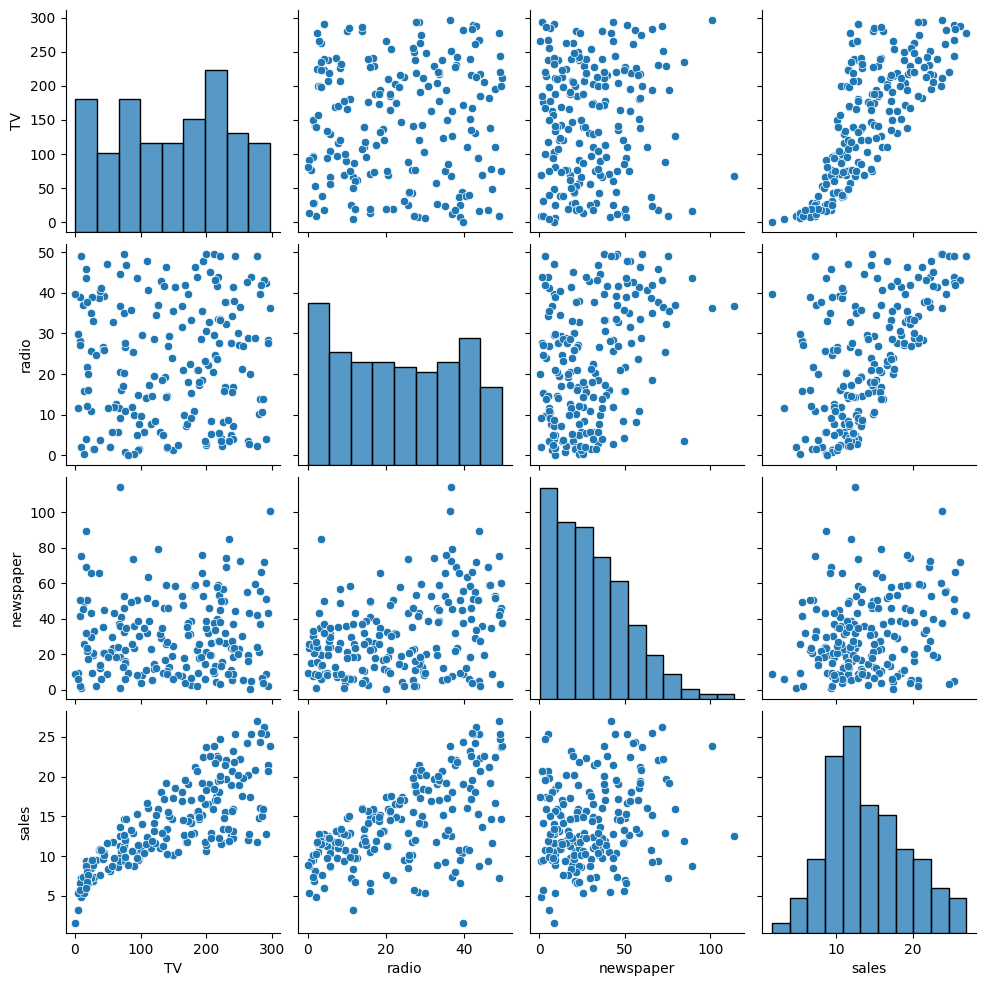

In [19]:
sns.pairplot(df);

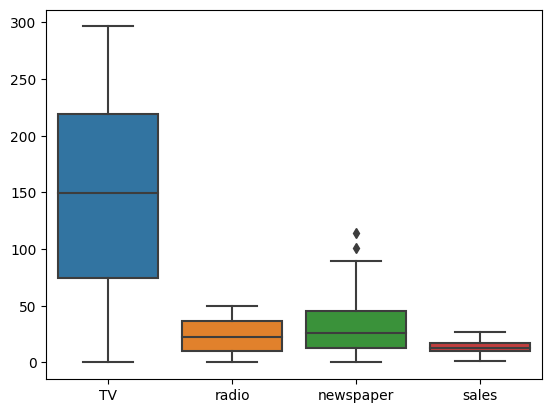

In [28]:
sns.boxplot(df);

In [20]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


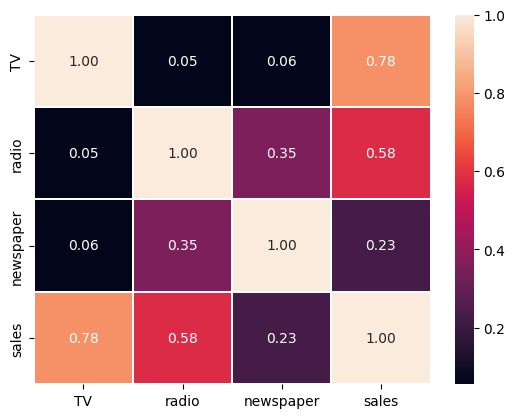

In [21]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidth=0.2);

***From the above heatmap we can conclude that TV has the highest impact on sales whereas newspaper had lowest impact.***

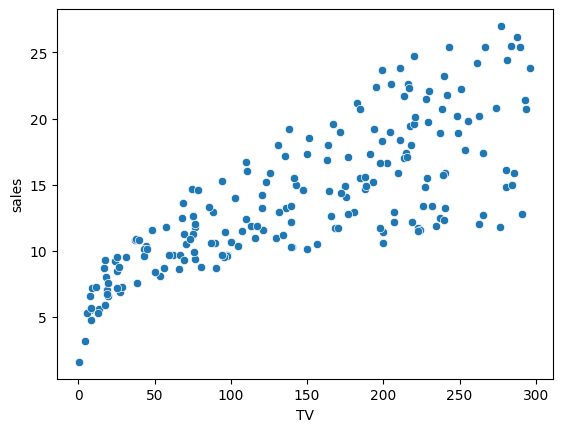

In [22]:
# Visualizing relationship between TV and sales.
sns.scatterplot(data = df, x=df['TV'], y=df['sales']);

## Preparing data for the model.

In [23]:
X = df.drop("sales", axis=1)
y = df['sales']

## Splitting data into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

## Using model RandomForest Regression for sales prediction.

In [73]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=88)
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9742594323951683

**Using all features we got the score of 97.42% with Random Forest Regressor**

In [47]:
def use_feature(model_name, feature_name):
    """
    Returns the default score using specified features on a model.
    Define model name and column name respectively.
    model_name: Define the model name without '()'. Eg. RandomForestRegressor
    feature_name: Define features name inside the list.
    """
    # Set up random seed.
    np.random.seed(88)

    X = df[feature_name]
    y = df['sales']

    # Data split into train and test sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)

    # Fit the model.
    model = model_name()
    model.fit(X_train, y_train)

    # Evaluate the model.
    return model.score(X_test, y_test)

In [44]:
use_feature(RandomForestRegressor, ['TV'])

0.5336039080046899

In [45]:
use_feature(RandomForestRegressor, ['radio'])

-0.2788911891976902

In [46]:
use_feature(RandomForestRegressor, ['newspaper'])

-0.3065247317429791

In [49]:
use_feature(RandomForestRegressor, ['TV', 'newspaper'])

0.610771952923904

In [74]:
use_feature(RandomForestRegressor, ['TV', 'radio'])

0.9777763621904222

In [50]:
# Using all features.
use_feature(RandomForestRegressor, ['TV', 'radio', 'newspaper'])

0.9742594323951683

In [71]:
scores = {
    "TV": use_feature(RandomForestRegressor, ['TV']),
    "Radio": use_feature(RandomForestRegressor, ['radio']),
    "Newspaper": use_feature(RandomForestRegressor, ['newspaper']),
    "TV & Newspaper": use_feature(RandomForestRegressor, ['TV', 'newspaper']),
    "Newspaper & Radio": use_feature(RandomForestRegressor, ['radio', 'newspaper']),
    "TV & Radio": use_feature(RandomForestRegressor, ['TV', 'radio']),
    "All features": use_feature(RandomForestRegressor, ['TV', 'radio', 'newspaper'])
}
scores

{'TV': 0.5336039080046899,
 'Radio': -0.2788911891976902,
 'Newspaper': -0.3065247317429791,
 'TV & Newspaper': 0.610771952923904,
 'Newspaper & Radio': 0.026640207616689837,
 'TV & Radio': 0.9777763621904222,
 'All features': 0.9742594323951683}

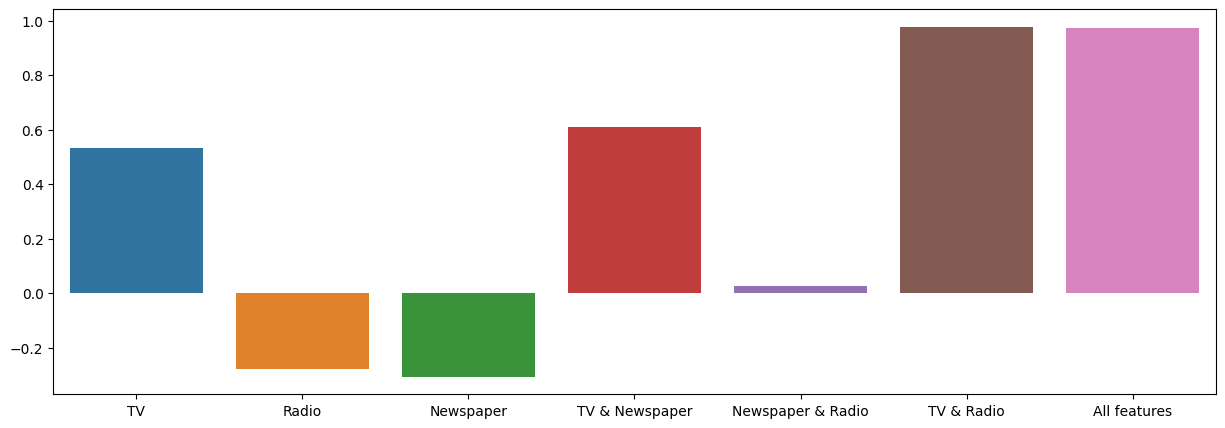

In [72]:
model_compare = pd.DataFrame(scores, index=['Accuracy'])

fig, ax = plt.subplots(figsize=(15, 5))
# ax.set_ylim(0.8, 1)
sns.barplot(model_compare);

### From the above bar plot we can see the predictions of combination of TV & radio only and combinations of all features are nearly same.

{'TV & Radio': 0.9777763621904222, 'All features': 0.9742594323951683}

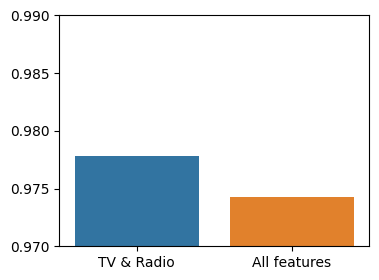

In [64]:
selected_scores = {
    "TV & Radio": use_feature(RandomForestRegressor, ['TV', 'radio']),
    "All features": use_feature(RandomForestRegressor, ['TV', 'radio', 'newspaper'])
}

model_compare = pd.DataFrame(selected_scores, index=['Accuracy'])

fig, ax = plt.subplots(figsize=(4, 3))
ax.set_ylim(0.97, 0.99)
sns.barplot(model_compare);
selected_scores

### Comparing the scores using the different features.
* Combining TV & Radio features can predict more accurate results then using single as well as all features.

### More Evaluation Metrics

In [76]:
# Using cross val score on RandomForest Regression.

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)
print(f"R Square Score: {scores}")
print(f"Mean Score: {scores.mean()}")
print(f"Standard Deviation of Scores: {scores.std()}")


R Square Score: [0.98009921 0.9821366  0.97191414 0.96286125 0.97891578]
Mean Score: 0.9751853917819536
Standard Deviation of Scores: 0.007056433688338906


In [77]:
# From different metrics
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, y_pred)
MAE = mean_absolute_error(y_test, y_pred)

print(f"MSE: {MSE}")
print(f"MAE: {MAE}")

MSE: 0.6837563499999965
MAE: 0.5796500000000002


# Using multiple machine models.
We are using following machine models for predicting sales.
1. Simple Linear Regression
2. Ridge Model
3. Poisson Regressor
4. Desicision Tree model

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import PoissonRegressor
from sklearn.tree import DecisionTreeRegressor

In [67]:
np.random.seed(88)
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Poisson Regressor": PoissonRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

In [68]:
# Creating a function for comparing different models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(88)
    model_score = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
    return model_score

In [69]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Linear Regression': 0.8402068643199276,
 'Ridge Regression': 0.8402113615003246,
 'Poisson Regressor': 0.788082159474793,
 'Decision Tree Regressor': 0.9590884064995506}

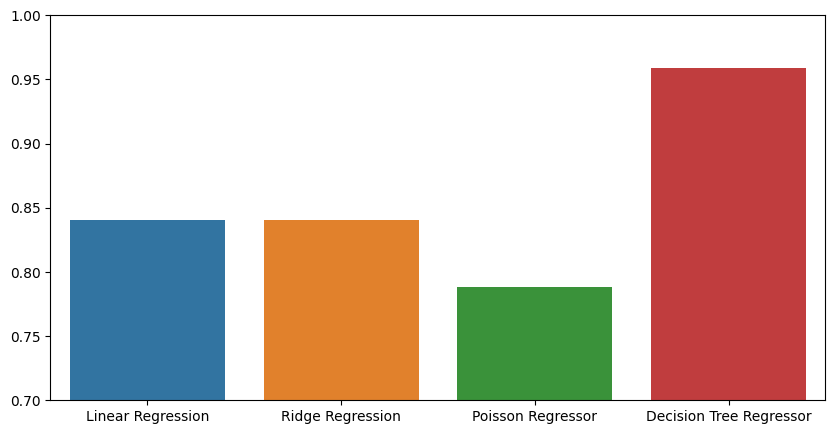

In [70]:
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylim(0.7, 1)
sns.barplot(model_compare);